In [1]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>

<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [1]:
## List of Imports ##
import random as rand
from ipywidgets import *
import math
from IPython.display import display, Javascript, clear_output
from traitlets import traitlets
from matplotlib.widgets import Slider, Button, RadioButtons
from fractions import Fraction

# Approximating Square Roots of Non-Perfect Squares

Welcome! In this notebook, we will explore how to estimate the roots of non-perfect square numbers.

As you progress through this math class, you will find that non-perfect squares become more prominant in finding areas and volumes, as well as in finding the side lengths of right triangles. Thus, it is important that we can approximate them, and also apply them to some geometric problems.

Note: Currently, the matplotlib figures break when the run all option is selected. This is due to the way plots and figure formating is handled. The way to get around this is to click run all, clear all outputs, close the notebook, and then reopen the notebook.

## Learning Objectives/Curriculum Objectives

To determine the approximate square root of numbers that are not perfect squares (limited to whole numbers).

## Background

Recall that a **perfect square** is a **whole number** (or positive integer) that is the product of **two identical integers** or **two other perfect squares**. Note that fractions can also be a perfect square. This will happen if the numerator and the denominator are both perfect squares. For example, ${\frac{4}{9}}$ is a perfect square, because 4 is a perfect square, and 9 is a perfect square. 

We could identify whether a number was a perfect square by factoring it into its prime factors or by drawing out a square on grid paper and determining the area. Also, remember that squaring a number and taking the square root are **opposite operations**.

Today, we will be looking at approximating **non-perfect squares**. Non-perfect squares are also **whole numbers** that are not a product of two identical integers or a product of two perfect squares. When we take the square root of these numbers, we won't get an integer, we will get a decimal number.

For example: 16 is a perfect square. Why? Well, we can either take its square root, or we can prime factorize it. If we prime factorize, we would get 16 = 2$\cdot$2$\cdot$2$\cdot$2. Now it may not look like that 16 is the product of two identical integers but it is. We can group the two's together and get 16 = 4 $\cdot$ 4. So, 16 is a perfect square. And, if we were to take the square root of 16, we would end up with ${\sqrt{16} = 4}$.

In contrast, if we prime factorize a non-perfect square, we would find that it has extra unpaired prime factors.

To illustrate this, let's prime factorize 72. After prime factorizing, we get: 72 = 2 $\cdot$ 2 $\cdot$ 2 $\cdot$ 3 $\cdot$ 3 or 72 = 2 $\cdot$ 4 $\cdot$ 9. So, we cannot write 72 as a product of perfect squares, we have a 2 which is unpaired. And we cannot write 72 as a product of identical integers either, since 2, 4, and 9 are different.

Also, the prime numbers: 2, 3, 5, 7, 11, 13,... are all non-perfect squares. This is because they have no factors other than 1 and themselves.

### Why we need to approximate:

We mentioned above that taking the square roots of non-perfect squares gives us a decimal number. More specifically, we will get an **irrational** decimal number. Irrational numbers are numbers that you cannot represent as a fraction, and square roots of non-perfect squares are an example of irrational numbers. A famous example is $\sqrt{2} = 1.414213\ldots$. $\sqrt{2}$ is an irrational number. It has no patterns in its decimal form, and it has infinite decimal places, so we cannot write it as a fraction.

Because these numbers have infinite decimal places, there is no way we can store all of the digits in a computer, we would need one with infinite storge, and that is not physically possible. So as a consquence, we can only store a limited number of decimal places, but we lose accuracy. In many areas of science, engineering and in some areas of math, we often deal with quantities that we can only approximate. An example would be the area of circle, or the volume of a cone, which will often be an irrational number.

In [2]:
# Required for buttons that can hold and return values #
class LoadedButton(widgets.Button):
    """A button that can holds a value as a attribute."""
    def __init__(self, value=0, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        # Create the value attribute.
        self.add_traits(value=traitlets.Any(value))

## Ways To Approximate Non-Perfect Squares

To begin, we will explore estimating the square roots of non-perfect squares using a calculator.

### Using a Calculator

The quickest and easiest way to approximate a non-perfect square is to use our calculators. Take the number you wish to approximate, find the ${\sqrt{}}$ key, and apply it. Now, depending on how many decimal places you keep, your approximation will be better or worse. 

#### Examples:

1) Approximate the square root of 11 to three decimal places: <br />
We take the square root of 11 and get 3.3166247904... . If we take three decimal places, we will end up with 3.316 as our approximation. And, if we square this number, we get 10.995856. <br />
    
2) Approximate the square root of 45 to five decimal places: <br />
Applying the square root key gives us 6.7082039325... . Taking five decimal places will give us: 6.70820. If we square this number, we get 44.99994724. <br />

3) Approximate the square root of 27 to one decimal place: <br />
Once again applying the square root key, we obtain 5.19611524227... . If we take one decimal place, we get 5.1. Squaring this number gives us 26.01, which is not very exact at all! <br />


As you can see above, taking fewer decimal places resulted in us losing accuracy. 

Now, we will explore the relationship between the accuracy of our estimate and the number of decimal places we keep. Choose an integer by adjusting the first slider, then choose the number of decimal places to keep with the second slider.

In [4]:
## Label Definitions ##
caption1 = widgets.Label(value = "Adjust the sliders to see how taking greater or fewer decimals affects our accuracy!")

## Functions for accuracy activity ##
def Take_Square_Root(Integer, Decimals):
    Estimate = 0
    Estimate = round(math.sqrt(Integer), Decimals) ## Round the integer to the specified number of decimal places ##
    ## Some caption definitions ##
    caption2 = widgets.Label(value = "Actual value: " + str(math.sqrt(Integer)) + ',')
    caption3 = widgets.Label(value = "Estimate: " + str(Estimate) + ',')
    caption4 = widgets.Label(value = "Actual value squared: " + str(Integer))
    caption5 = widgets.Label(value = "Estimate squared: " + str(Estimate ** 2))
    container = widgets.HBox(children = [caption2, caption4])
    container2 = widgets.HBox(children = [caption3, caption5])
    display(container)
    display(container2)
    
display(caption1)

#I added "name = " in front of the interact to stop it displaying that output under it
name = interact(Take_Square_Root, Integer = widgets.IntSlider(min = 1, max = 130, value = 1), Decimals = widgets.IntSlider(min = 1, max = 9, step = 1))

Label(value='Adjust the sliders to see how taking greater or fewer decimals affects our accuracy!')

interactive(children=(IntSlider(value=1, description='Integer', max=130, min=1), IntSlider(value=1, description='Decimals', max=9, min=1), Output()), _dom_classes=('widget-interact',))

#### Questions:

What did you observe as you took more or less decimal places?
How did the estimate differ from the exact value?

### Finding non-perfect square roots on a number line:

Now, we will try to approximate square roots of non-perfect squares using a number line. Suppose we want to approximate the square root of 90 by looking at a number line, denoted by the blue square.

<img src="files/Example_Pt1.jpg">

In order to determine an estimate for the square root of 90, we need to find the closest perfect squares to 90. Those would be 81 and 100. This also means that the square root of 90 falls in between the square root of 81 and the square root of 100, which are 9 and 10. They are shown by the red dots.

<img src="files/Example_Pt2.jpg">

We can see that the square root of 90 is almost halfway between 9 and 10, its just a little bit under 9.5. So, lets try guessing a number that is just a little bit smaller than 9.5, say, 9.45. Our guess is shown by the green diamond.

<img src="files/Example_Pt3.jpg">

Ah, we can see that our guess is close. If we check what the square root of 90 is on our calculator, we find that it equals 9.48683... . It is very difficult to achieve perfect accuracy just visually, however, for our purposes, our guess is good!

### Another way to estimate:

Our guess of 9.45 is a good guess, but if we want more accuracy we need to use another way. Say that we want to estimate the square root of 90 again, but this time we don't want to estimate it visually. Then, we do the following steps:

> 1. First, we need to find what perfect squares 90 lies between. Taking a look at the numberline, its 81 and 100. <br />
> 2. Next, we find the difference between the larger perfect square and the smaller perfect square, which would be 100 - 81 = 19. <br />
> 3. Then, we find the difference between the non-perfect square, which is 90 in this example, and the smaller perfect square, 81. So we would get 90 - 81 = 9. <br />
> 4. Now, we will form a fraction, with the number we got in step three as our numerator, and the number we got in step two as our denominator. So we would have 9/19. <br />
> 5. Next, we will take the square root of the smaller perfect square, in this case 81, and then add our fraction to it. So we get 9 + 9/19. In decimal form, this is 9.47368... . <br />
> 6. Finally, square the number you got in step 5, in this example, we get 89.74909. <br />

Excellent! Our guess is a lot closer now than before when we determined it visually.

In this next activity, we will apply what we have learned above to finding square roots on a number line. Click the generate button, and the activity will start. First, find the larger and smaller perfect squares on the number line. Remember, they have to be the closest perfect squares. If you have found the two closest squares, then estimate it visually and enter your answer, you should see it placed on the number line. We aren't looking for perfect accuracy, just find a value that is close to the actual answer.

To help you, this number line has a zoom feature, to the left of the file button. If you need a closer look, click on the zoom to rectangle button, and drag where you want to zoom. To reset the view, click the house.

We can also apply the steps we saw above to find an estimate. If you feel that you are ready, perform the steps on paper, and then plot it on the number line.

If you want to get a new question, click the reset button, then click the generate button.

In [19]:
## Imports ##
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

## Widget Definitions ##
style = {'description_width': 'initial'}
Get_Smaller_Square = widgets.Text(description = "Enter the smaller perfect square:", style = style, value = '0')
Get_Larger_Square = widgets.Text(description = "Enter the larger perfect square:", style = style, value = '0')
Get_User_Estimate = widgets.Text(description = "What is your estimate?", style = style, value = '0')
Generate = LoadedButton(description = "Generate:")
Get_Actual_Value = widgets.Button(description = "Get the actual value: ")
Reset = widgets.Button(description = "Reset")

## These allow for captions to be displayed/hid, so we don't have a long list of print statements that ##
## we can't get rid off ##
Generate_text = widgets.HTML("")
Actual_Value_text = widgets.HTML("")
error_text = widgets.HTML("")

Generate_text.value = "Waiting for new value."
Actual_Value_text.value = "Wating for new value."
error_text.value = "No error to report."

In [20]:
## Handlers for Widgets ##

global Non_Perfect_Square
Non_Perfect_Square = 0

## Function to Generate a random integer ##
def Generate_Int(ex):
    Axes.clear()
    ex.value = 0
    Build_Number_Line(0,0)
    ex.value = rand.randint(5,399)
    Non_Perfect_Square = ex.value
    
    ## This while loop checks if we have generated a perfect square, if we have, regenerate ##
    while(int(math.sqrt(ex.value)) * int(math.sqrt(ex.value)) == ex.value):
        ex.value = rand.randint(5,399)
        Non_Perfect_Square = ex.value
    
    Generate_text.value = "Estimate the square root of " + str(ex.value) + " on the number line."
    
    plt.plot(math.sqrt(ex.value), 0, 'bs')
    plt.show()

## Get the use input and plot it on the number line ##
def New_Values_Submitted(sender):
    Smaller = 0
    Larger = 0
    Smaller = int(Get_Smaller_Square.value)
    Larger = int(Get_Larger_Square.value)
    if (Smaller and Larger <= -1):
        error_text.value = "Both of your values are less than 0, please re-enter!" #Any errors are displayed in the error widget
        Get_Smaller_Square.value = '0'
        Get_Larger_Square.value = '0'
    else:
        error_text.value = "" #This will erase the text from the error widget when there are no errors
        Build_Number_Line(Smaller, Larger)
    
## This function displays the actual square root of the number generated in Generate_Int ##
def Actual_Value(sender):
    ## The text is assigned to the actual value widget ##
    ## Whenever you hit the button again the text is replaced by the new value ##
    Actual_Value_text.value = "The actual value is: " + str(math.sqrt(Generate.value))
    
## This function plots the users guess on the number line ##
def Display_User_Estimate(sender):
    User_Guess = float(Get_User_Estimate.value)
    plt.plot(User_Guess, 0, 'o')
    plt.show()
    
## This function resets the activity by setting all widgets to default vaules and by re-plotting points ##
def Reset_Activity(sender):
    Actual_Value_text.value = "Waiting for new value."
    Generate_text.value = "Waiting for new value."
    error_text.value = "No error to report." 
    Generate.value = 0
    Get_Actual_Value.value = 0
    Get_Smaller_Square.value = '0'
    Get_Larger_Square.value = '0'
    Get_User_Estimate.value = '0'
    Build_Number_Line(0,0)

<IPython.core.display.Javascript object>


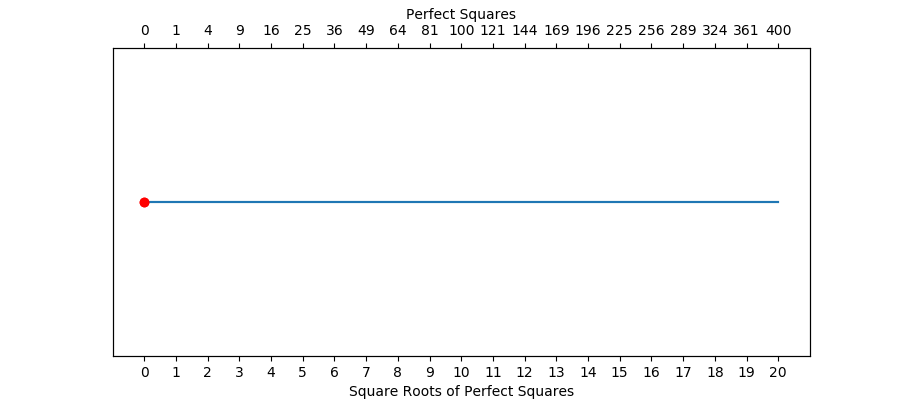

HBox(children=(Text(value='0', description='Enter the smaller perfect square:', style=DescriptionStyle(description_width='initial')), Text(value='0', description='Enter the larger perfect square:', style=DescriptionStyle(description_width='initial')), Text(value='0', description='What is your estimate?', style=DescriptionStyle(description_width='initial'))))

HBox(children=(LoadedButton(description='Generate:', style=ButtonStyle()), Button(description='Get the actual value: ', style=ButtonStyle()), Button(description='Reset', style=ButtonStyle())))

VBox(children=(HTML(value='Waiting for new value.'), HTML(value='Wating for new value.'), HTML(value='No errors to report.')))

In [21]:
## Figure and Axes Definitions ##
Activity_One, Axes = plt.subplots()
Axes_2 = Axes.twiny()
    
## This will build and format the number line for this activity ##
def Build_Number_Line(Smaller, Larger):
    
    Axes.clear()
    Axes_2.clear()
    Non_Perfect_Square = Generate.value
    if(Non_Perfect_Square != 0):
        plt.plot(math.sqrt(Non_Perfect_Square), 0, 'bs')
    
    ## Modify Axes for number line ##
    X_Axis = np.arange(0,21,1)
    Y_Axis = np.zeros_like(X_Axis) + 0

    X_Axis_2 = X_Axis ** 2
    plt.xticks(np.arange(0,21,1)) ## Adjust the step on the X-Axis ##
    Axes.axes.get_yaxis().set_visible(False) ## Set Y-axis to not visible ##
    
    ## Modify Top Axis ##
    Axes_2.set_xticks(np.arange(0,21,1))
    Axes_2.set_xbound(Axes.get_xbound())
    Axes_2.set_xticklabels(X_Axis_2)
    Axes_2.set_xlabel("Perfect Squares")

    ## Modify Botton Axis ##
    Axes.set_xticklabels(X_Axis) ## Adjust the step on the X-Axis ##
    Axes.set_xticks(np.arange(0,21,1))
    Axes.plot(X_Axis, Y_Axis)
    Axes.set_xlabel("Square Roots of Perfect Squares")
    
    ## Adjust Figure Size ##
    fig_size =  plt.rcParams["figure.figsize"]
    fig_size[0] = 9
    fig_size[1] = 4
    
    plt.plot(X_Axis, Y_Axis)
    
    ## Plot the Data ##
    plt.plot(math.sqrt(Smaller), 0, 'ro')
    plt.plot(math.sqrt(Larger), 0, 'ro')
    plt.show()
    

Build_Number_Line(0,0)

container = widgets.HBox(children = [Get_Smaller_Square, Get_Larger_Square, Get_User_Estimate])
container_two = widgets.HBox(children = [Generate, Get_Actual_Value, Reset])

##Container to display text widgets ##
container_three = widgets.VBox(children=[Generate_text, Actual_Value_text, error_text])

## Display the containers ##
display(container)
display(container_two)
display(container_three) 

Generate.on_click(Generate_Int)
Reset.on_click(Reset_Activity)
Get_Actual_Value.on_click(Actual_Value)
Get_Smaller_Square.on_submit(New_Values_Submitted)
Get_Larger_Square.on_submit(New_Values_Submitted)
Get_User_Estimate.on_submit(Display_User_Estimate)

### Questions / Practice:

Did having a visual representation help in finding the square roots?
Were your estimates close to the actual values?
Did using the steps above create a more accurate estimate?

To practice, preform this activity as many times as you want, if you think you are ready, continue on.

## Application:

Now, we are going to apply the knowledge we have learned to approximate the side lengths of squares.

For example, say we want to approximate the side length of the square with area 130:

<img src="files/Example2_Pt1.jpg">

We can see that the side lengths of this square fall between 11 and 12. So, we now create a square of side length 11, and a square of side length 12.

<img src="files/Example2_Pt2.jpg">

Now we can see that the side length of the imperfect square is closer to 11 than it is to 12. Now, we can apply what we have seen from the number line activity. We can either guess the side length visually, or we can find an estimate by calculating it using the steps above. Calculating gives a better estimate, so after doing so, we find the estimated side length equal to 11.39130... . 

<img src="files/Example2_Pt3.jpg">

We are pretty close!

In this activity, we will practice finding side lengths. First, use the button to generate a square with non-perfect area. Then, use the sliders to bound the non-perfect square with a smaller and larger squares. If you think you have the right squares, estimate the side length visually, or calculate it, your answer should appear on the figure.

If you are ready for a new question, press the reset button and then click the generate button.

In [10]:
## Widget definitions for Activity Two ##
style = {'description_width': 'initial'}
Get_Side_Length_Guess = widgets.Text(description = "What do you think the side length is?", style = style, value = '0')
Get_Side_Length = widgets.Button(description = "Get Side Length: ")
Reset_Activity = widgets.Button(description = "Reset: ")
Generate_Square = LoadedButton(description = "Get a square: ")
Generate_text = widgets.HTML("")
Actual_Value_text = widgets.HTML("")

Actual_Value_text.value = "Waiting for new value."
Generate_text.value = "Waiting for new value."

Button_Container = widgets.HBox(children = [Generate_Square, Get_Side_Length, Reset_Activity])

## Widget Handlers ##

## Function to get a random non-perfect square area ##
def Generate_Square_Area(ex):
    ex.value = 0
    Axes.clear()
    Rectangle_Activity(0,0)
    ex.value = rand.randint(5,395)
    
    ## This while loop checks if we have generated a perfect square, if we have, regenerate ##
    while(int(math.sqrt(ex.value)) * int(math.sqrt(ex.value)) == ex.value):
        ex.value = rand.randint(5,399)
        
    Generate_text.value = "Find the side length of a square with area " + str(ex.value)
    Imperfect_Rectangle = matplotlib.patches.Rectangle((0,0), math.sqrt(ex.value), math.sqrt(ex.value), alpha = 0.5)
    Axes.add_patch(Imperfect_Rectangle)
    plt.show()
    
## Display the actual side length ##
def Get_Actual_Value(sender):
    Actual_Value_text.value = "The actual side length is:"+ str(math.sqrt(Generate_Square.value))
    
    
## Get the user guess and plot it as a rectangle ##
def User_Guess(sender):
    User_Estimate = float(Get_Side_Length_Guess.value)
    User_Square = matplotlib.patches.Rectangle((0,0), 0, 0, color = 'yellow', alpha = 0.5)
    Axes.add_patch(User_Square)
    plt.show()
    
## Reset the activity ##
def Reset_Figure(sender):
    Actual_Value_text.value = "Waiting for new value."
    Generate_text.value = "Waiting for new value."
    Generated_Number = 0
    Generate_Square.value = 0
    Get_Side_Length_Guess.value = '0'
    Axes.clear()
    Rectangle_Activity(0,0)

<IPython.core.display.Javascript object>


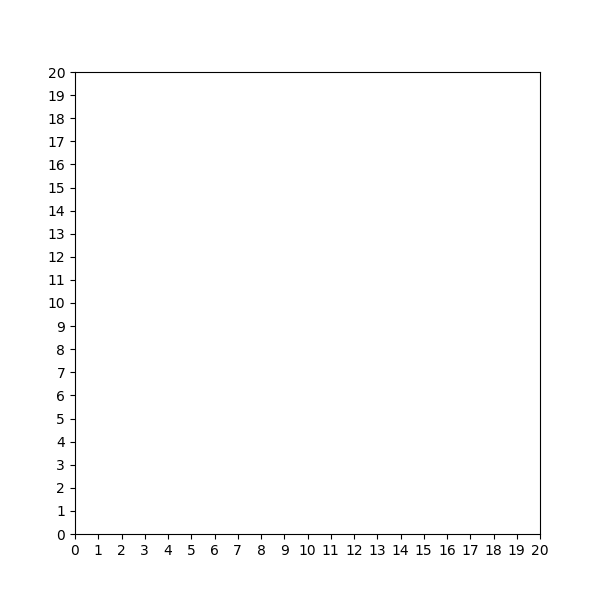

interactive(children=(IntSlider(value=0, description='Smaller', max=20), IntSlider(value=0, description='Larger', max=20), Output()), _dom_classes=('widget-interact',))

Text(value='0', description='What do you think the side length is?', style=DescriptionStyle(description_width='initial'))

HBox(children=(LoadedButton(description='Get a square: ', style=ButtonStyle()), Button(description='Get Side Length: ', style=ButtonStyle()), Button(description='Reset: ', style=ButtonStyle())))

HTML(value='Waiting for new value.')

HTML(value='Waiting for new value.')

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

Activity_Two = plt.figure()
Axes = plt.gca()
Generated_Number = 0

def Rectangle_Activity(Smaller, Larger):
    
    Axes.clear()
    
    Generated_Number = Generate_Square.value
    ## Rectangle Definitions ##
    Smaller_Rectangle = matplotlib.patches.Rectangle((0,0), 0, 0, alpha = 0.5)
    Larger_Rectangle = matplotlib.patches.Rectangle((0,0), 0, 0, alpha = 0.5)
    Imperfect_Rectangle = matplotlib.patches.Rectangle((0,0), math.sqrt(Generated_Number), math.sqrt(Generated_Number), alpha = 0.5)
    
    ## Format Axis ##
    X_Axis = np.arange(0,21,1)
    Y_Axis = np.arange(0,21,1)
    plt.xticks(np.arange(0,21,1))
    plt.yticks(np.arange(0,21,1))
    
    ## Adjust frame size ##
    fig_size2 = plt.rcParams["figure.figsize"] 
    fig_size2[0] = 6.0
    fig_size2[1] = 6.0
    
    ## Update Height and Width ##
    Smaller_Rectangle.set_height(Smaller)
    Smaller_Rectangle.set_width(Smaller)
    
    Larger_Rectangle.set_height(Larger)
    Larger_Rectangle.set_width(Larger)
    
    Axes.add_patch(Smaller_Rectangle)
    Axes.add_patch(Larger_Rectangle)
    Axes.add_patch(Imperfect_Rectangle)
    
    plt.show()

interact(Rectangle_Activity, Smaller = widgets.IntSlider(min = 0, max = 20, step = 1, value = 0),
         Larger = widgets.IntSlider(min = 0, max = 20, step = 1, value = 0))

display(Get_Side_Length_Guess)
display(Button_Container)
display(Generate_text)
display(Actual_Value_text)
Get_Side_Length_Guess.on_submit(User_Guess)
Generate_Square.on_click(Generate_Square_Area)
Get_Side_Length.on_click(Get_Actual_Value)
Reset_Activity.on_click(Reset_Figure)

### Questions / Practice:

Practice this activity in two ways, estimate the side length visually and find the side length of the square. Then, apply the non-visual method find a better estimate.

## Conclusion:

In this notebook, we have seen how to:

> 1. Check whether or not a number is a perfect or non-perfect square through prime factorization <br />
> 2. Explored how keeping more or less decimal places affects accuracy <br />
> 3. Found how to use number lines to our advantage in estimating square roots <br />
> 4. Applied these methods to finding unknown side lengths of squares <br />

By now, you should be comfortable estimating the square roots of non-perfect squares, both visually and by using the formula.